
---

# 🧠 Image Noise Filtering — Theory

## 🎯 Overview

Noise filtering (or image smoothing) is a crucial preprocessing step in computer vision and image processing. It removes unwanted random variations (noise) in pixel intensities while preserving important structures such as edges and textures.

There are three commonly used spatial domain filters:

* **Median Filter**
* **Gaussian Filter**
* **Bilateral Filter**

Each has different strengths depending on the type of noise and the desired trade-off between smoothness and edge preservation.

---

## 🧩 1. Median Filter

**Type:** Non-linear filter
**Kernel operation:** Replaces each pixel with the *median* of neighboring pixel values.

### 🔹 Formula

There’s no direct algebraic form. For each pixel ( I(x, y) ), within a neighborhood ( N(x, y) ):

$$[
I'(x, y) = \text{median}{I(i, j) \mid (i, j) \in N(x, y)}
]$$

### 🔹 Characteristics

* Excellent at removing **salt-and-pepper noise** (impulse noise).
* **Preserves edges** better than averaging filters.
* Non-linear → not suitable for frequency domain analysis.

### 🔹 Example

If a 3×3 window contains:

```
10, 10, 12
10, 255, 11
10, 10, 12
```

The median = 11 → replaces the center (255) with 11.

---

## 🌫 2. Gaussian Filter

**Type:** Linear filter
**Kernel operation:** Convolution with a Gaussian function (bell-shaped).

### 🔹 Formula

The 2D Gaussian kernel is defined as:

$$[
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
]$$

Filtered image:
$$[
I'(x, y) = \sum_{i,j} I(x+i, y+j) \cdot G(i, j)
]$$

### 🔹 Characteristics

* Reduces **Gaussian (normal) noise**.
* Produces smooth, blurred results.
* Blurs both noise and **edges** — so not ideal when edge preservation matters.
* Controlled by kernel size and standard deviation ( $\sigma$ ).

### 🔹 Effect

Higher ( $\sigma$ ) → stronger smoothing, more blur.

---

## 🎨 3. Bilateral Filter

**Type:** Non-linear, edge-preserving filter
**Kernel operation:** Combines spatial proximity and intensity similarity.

### 🔹 Formula

$$[
I'(x, y) = \frac{1}{W_p} \sum_{i,j} I(i, j) \cdot f_s(||(i, j)-(x, y)||) \cdot f_r(|I(i,j) - I(x,y)|)
]$$

Where:

* ( $f_s$ ): spatial Gaussian → depends on distance.
* ( $f_r$ ): range Gaussian → depends on intensity difference.
* ( $W_p$ ): normalization factor.

### 🔹 Characteristics

* Reduces noise **while preserving edges**.
* Useful for **natural images** and **photo enhancement**.
* Computationally expensive compared to Gaussian and median filters.

---

## ⚖️ Comparison Table

| Filter Type   | Operation                                | Removes               | Preserves Edges | Complexity | Typical Use               |
| ------------- | ---------------------------------------- | --------------------- | --------------- | ---------- | ------------------------- |
| **Median**    | Non-linear (median of neighborhood)      | Salt-and-pepper noise | ✅ Good          | Low        | Binary / grayscale images |
| **Gaussian**  | Linear (convolution with Gaussian)       | Gaussian noise        | ❌ Weak          | Medium     | General smoothing         |
| **Bilateral** | Non-linear (spatial + intensity weights) | General noise         | ✅ Excellent     | High       | Color / natural images    |

---

## 📘 References

* Gonzalez & Woods, *Digital Image Processing*, 4th Edition
* OpenCV Documentation — [https://docs.opencv.org](https://docs.opencv.org)
* Tomasi & Manduchi, *Bilateral Filtering for Gray and Color Images*, ICCV 1998

---


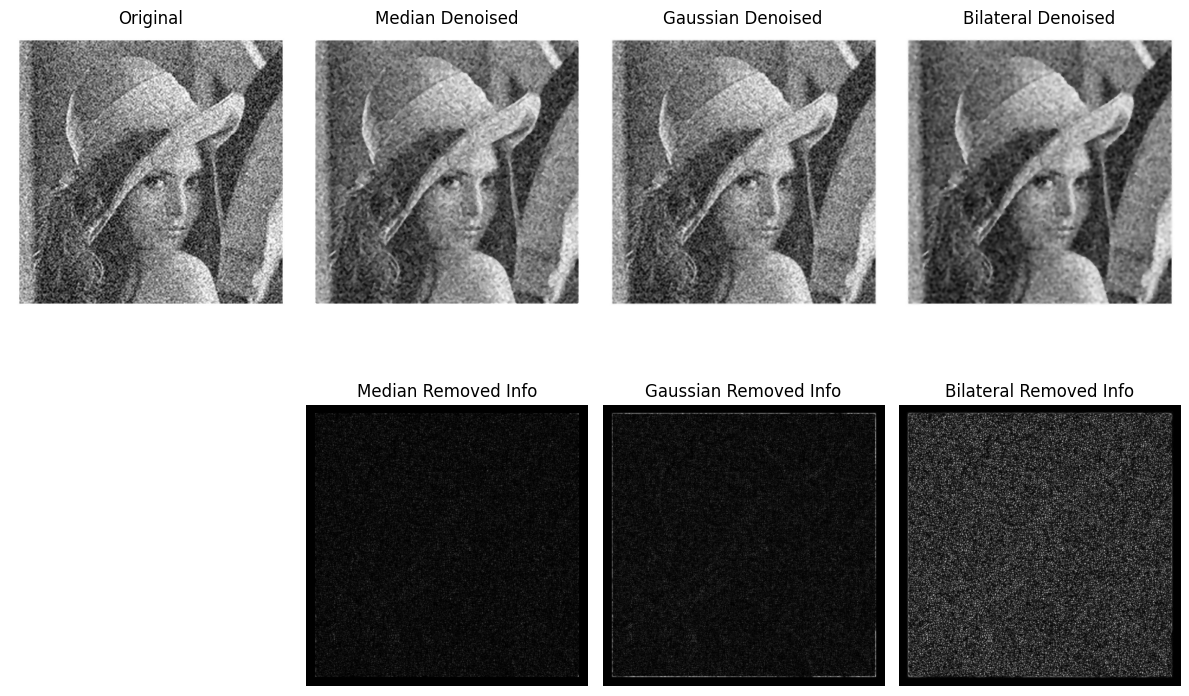

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# --- Load the image in grayscale ---
img = cv2.imread('gnoise.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Could not find 'image.png' in the current directory.")

# --- Apply Filters ---
median_filtered = img
for i in range(1):
    median_filtered = cv2.medianBlur(median_filtered, 5)
gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 1)
bilateral_filtered = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

# --- Compute Absolute Differences (what was removed) ---
diff_median = cv2.absdiff(img, median_filtered)
diff_gaussian = cv2.absdiff(img, gaussian_filtered)
diff_bilateral = cv2.absdiff(img, bilateral_filtered)

# --- Plot Results ---
plt.figure(figsize=(12, 8))

# Row 1: Original and Denoised Images
plt.subplot(2, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Denoised')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Denoised')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(bilateral_filtered, cmap='gray')
plt.title('Bilateral Denoised')
plt.axis('off')

# Row 2: Differences (Removed Information)
plt.subplot(2, 4, 6)
plt.imshow(diff_median, cmap='gray')
plt.title('Median Removed Info')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(diff_gaussian, cmap='gray')
plt.title('Gaussian Removed Info')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(diff_bilateral, cmap='gray')
plt.title('Bilateral Removed Info')
plt.axis('off')

plt.tight_layout()
plt.show()


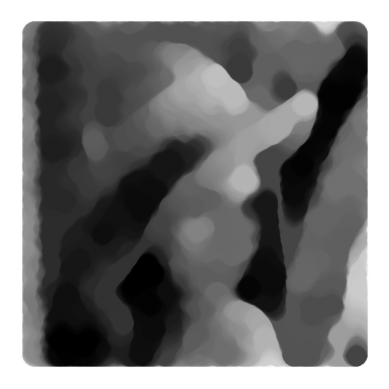

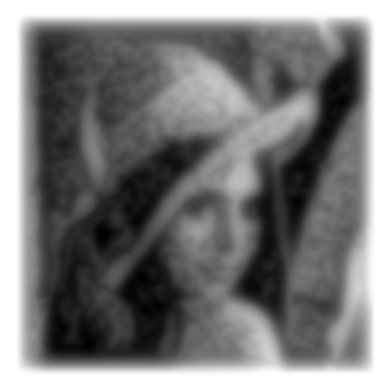

In [26]:
median_filtered = img
gaussian_filtered = img
for i in range(10_000):
    median_filtered = cv2.medianBlur(median_filtered, 7)
    gaussian_filtered = cv2.GaussianBlur(gaussian_filtered, (7, 7), 1)

plt.imshow(median_filtered,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(gaussian_filtered,cmap='gray')
plt.axis('off')
plt.show()

## 📦 Box Filter (Averaging Filter)

A **box filter**, also known as an **averaging filter**, is a simple linear filter used for image smoothing.  
It replaces each pixel value with the **average value of its neighbors** within a defined kernel window (e.g., 3×3, 5×5).  

### Formula
$$
g(x, y) = \frac{1}{N} \sum_{(i,j) \in \text{kernel}} f(x+i, y+j)
$$
Where:
- \( f(x, y) \) is the original image,
- \( g(x, y) \) is the filtered image,
- \( N \) is the number of pixels in the kernel.

### Effect
- Reduces random noise.
- Blurs edges slightly.
- Useful for basic smoothing before more complex operations (e.g., edge detection).

In OpenCV, this can be done using:
- `cv2.blur()` → simple box filter
- `cv2.boxFilter()` → more general form (can control normalization)

Below is an example using `cv2.blur()`:


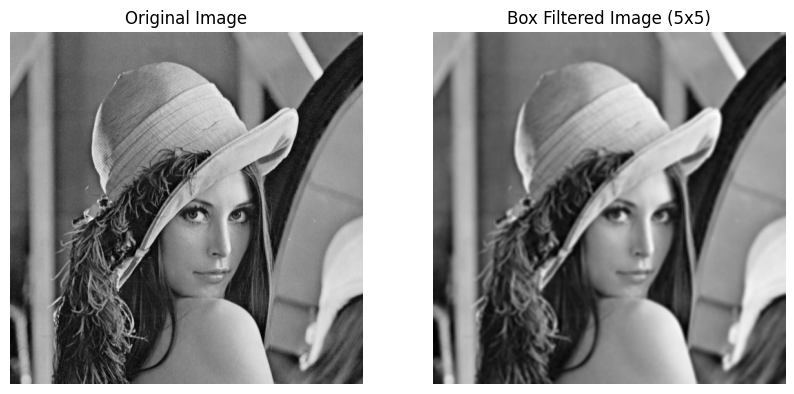

In [2]:
import cv2
import matplotlib.pyplot as plt

# --- Read image as grayscale ---
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found!")

# --- Apply Box Filter (Averaging Filter) ---
# kernel size = 5x5
blurred = cv2.blur(img, (5,5))

# --- Plot original and filtered image ---
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Box Filtered Image (5x5)")
plt.imshow(blurred, cmap="gray")
plt.axis("off")

plt.show()


## ✨ Image Sharpening using Gaussian Filter

**Sharpening** enhances the edges and fine details of an image.

A common method uses the **Unsharp Masking** technique:
1. Blur the image using a **Gaussian filter**.
2. Subtract the blurred image from the original to get the **details (high frequencies)**.
3. Add those details back to the original image to produce a sharpened result.

### Formula
$$
\text{sharpened} = \text{original} + \alpha \times (\text{original} - \text{blurred})$$

Where:
- \( \alpha \) controls the sharpening intensity (usually between 1.0 and 2.0)
- Gaussian blur smooths low-frequency components.

This method enhances edges without introducing excessive noise.


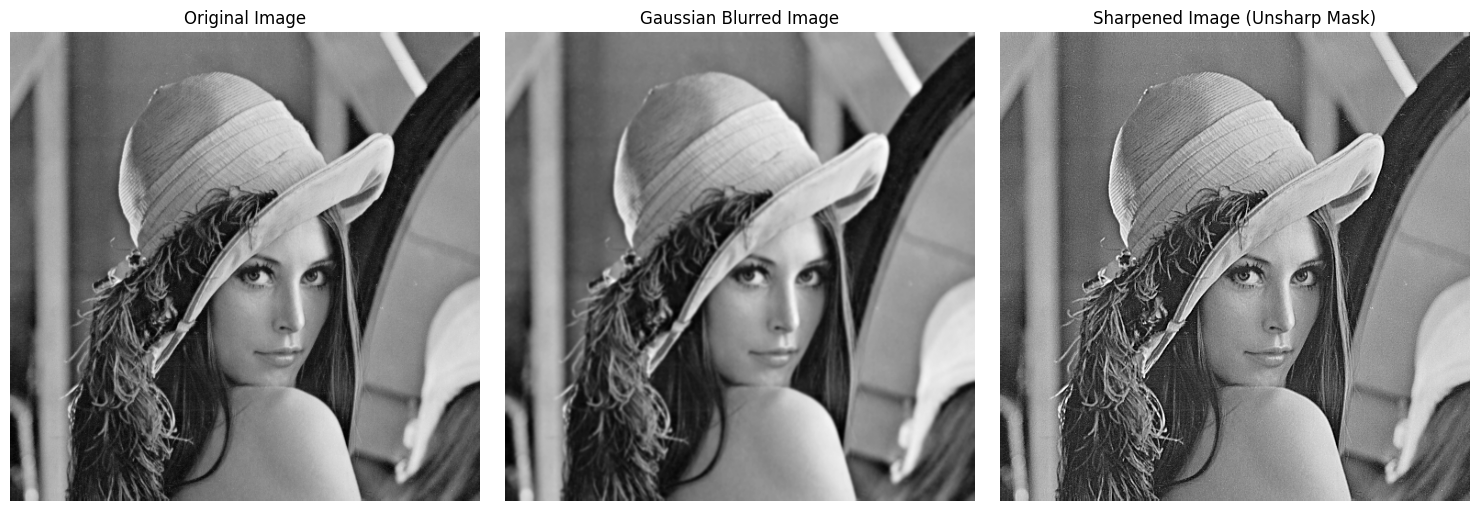

In [3]:
import cv2
import matplotlib.pyplot as plt

# --- Read image as grayscale ---
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found!")

# --- Apply Gaussian Blur ---
blurred = cv2.GaussianBlur(img, (5, 5), 1.0)

# --- Sharpening (Unsharp Mask) ---
alpha = 1.5  # Sharpening factor
sharpened = cv2.addWeighted(img, 1 + alpha, blurred, -alpha, 0)

# --- Plot Comparison ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Gaussian Blurred Image")
plt.imshow(blurred, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Sharpened Image (Unsharp Mask)")
plt.imshow(sharpened, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


## ⚡ Edge Detection using Laplacian and Roberts Filters

Edge detection highlights regions of rapid intensity change — where object boundaries or texture details appear.

### 1️⃣ Laplacian Filter
- A **second-order derivative** operator.
- Detects edges by measuring intensity curvature (regions where gradients change rapidly).
- Sensitive to noise, so often preceded by smoothing (like Gaussian blur).

**Kernel Example (3×3):**

\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
\]
or sometimes:
\[
\begin{bmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{bmatrix}


---

### 2️⃣ Roberts Cross Filter
- A **first-order derivative** operator.
- Computes gradient magnitude using diagonal differences.
- Works well on small, sharp transitions.

**Kernels:**

G_x =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix},
$$\quad$$
G_y =
\begin{bmatrix}
0 & 1 \\
-1 & 0
\end{bmatrix}


---

### 🧩 Output Comparison
- Laplacian → strong global edge response.
- Roberts → fine diagonal edges, more sensitive to noise.


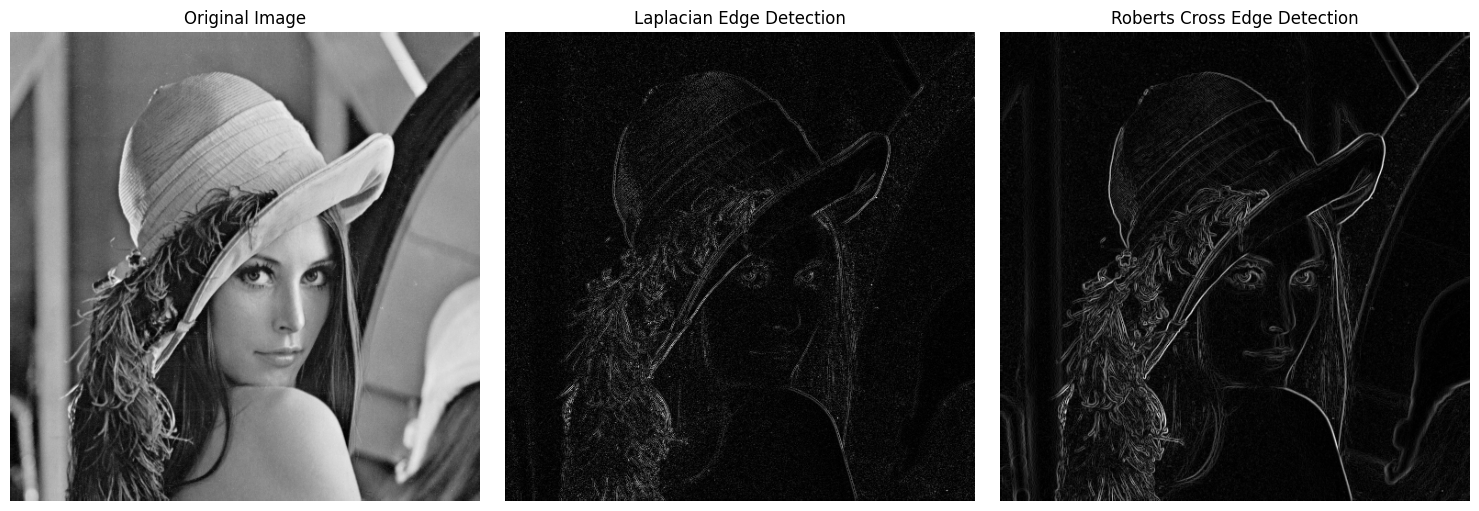

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Read grayscale image ---
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found!")

# --- Laplacian Edge Detection ---
laplacian = cv2.Laplacian(img, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)  # convert back to uint8

# --- Roberts Cross Edge Detection ---
# Define Roberts kernels
roberts_cross_x = np.array([[1, 0],
                            [0, -1]], dtype=np.float32)
roberts_cross_y = np.array([[0, 1],
                            [-1, 0]], dtype=np.float32)

# Apply kernels
roberts_x = cv2.filter2D(img, cv2.CV_64F, roberts_cross_x)
roberts_y = cv2.filter2D(img, cv2.CV_64F, roberts_cross_y)

# Combine gradients
roberts = cv2.convertScaleAbs(np.sqrt(roberts_x**2 + roberts_y**2))

# --- Plot results ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Laplacian Edge Detection")
plt.imshow(laplacian, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Roberts Cross Edge Detection")
plt.imshow(roberts, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


## ⚙️ Directional Edge Detection using Laplacian Variants

The **Laplacian operator** is a second derivative filter:

$\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$


By modifying its kernel, we can emphasize edges in **specific directions**:

### 🔹 Vertical

\begin{bmatrix}
0 & -1 & 0 \\
0 & 2 & 0 \\
0 & -1 & 0
\end{bmatrix}


### 🔹 Horizontal

\begin{bmatrix}
0 & 0 & 0 \\
-1 & 2 & -1 \\
0 & 0 & 0
\end{bmatrix}


### 🔹 Diagonal

\begin{bmatrix}
-1 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & -1
\end{bmatrix}


## 🧩 Full 8-Neighborhood Laplacian (All-Direction Edges)

The **8-neighbor Laplacian** detects edges in **every direction** — horizontal, vertical, and diagonal.

It’s defined as:

\begin{bmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1
\end{bmatrix}


### Comparison
- **Directional Laplacians** → emphasize specific orientations (horizontal, vertical, diagonal).
- **8-neighbor Laplacian** → stronger, isotropic edge detection (all around each pixel).

This operator is equivalent to summing all three directional Laplacians.



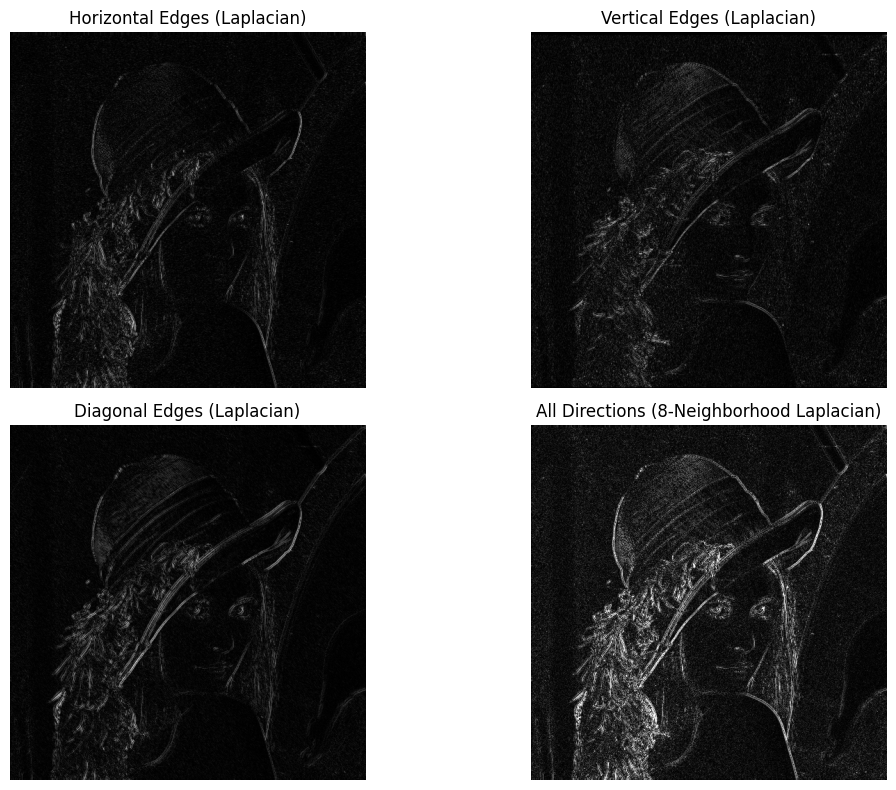

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load grayscale image ---
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found!")

# --- Define directional Laplacian kernels ---
laplacian_horizontal = np.array([[0, 0, 0],
                                 [-1, 2, -1],
                                 [0, 0, 0]], dtype=np.float32)

laplacian_vertical = np.array([[0, -1, 0],
                               [0, 2, 0],
                               [0, -1, 0]], dtype=np.float32)

laplacian_diagonal = np.array([[-1, 0, 0],
                               [0, 2, 0],
                               [0, 0, -1]], dtype=np.float32)

# --- 8-neighbor Laplacian (all directions) ---
laplacian_all = np.array([[1, 1, 1],
                          [1, -8, 1],
                          [1, 1, 1]], dtype=np.float32)

# --- Apply filters ---
edge_horizontal = cv2.filter2D(img, cv2.CV_64F, laplacian_horizontal)
edge_vertical = cv2.filter2D(img, cv2.CV_64F, laplacian_vertical)
edge_diagonal = cv2.filter2D(img, cv2.CV_64F, laplacian_diagonal)
edge_all = cv2.filter2D(img, cv2.CV_64F, laplacian_all)

# --- Normalize for visualization ---
def normalize(x):
    return cv2.convertScaleAbs(x)

edge_horizontal = normalize(edge_horizontal)
edge_vertical = normalize(edge_vertical)
edge_diagonal = normalize(edge_diagonal)
edge_all = normalize(edge_all)

# --- Plot results ---
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Horizontal Edges (Laplacian)")
plt.imshow(edge_horizontal, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Vertical Edges (Laplacian)")
plt.imshow(edge_vertical, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Diagonal Edges (Laplacian)")
plt.imshow(edge_diagonal, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("All Directions (8-Neighborhood Laplacian)")
plt.imshow(edge_all, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


## 🧱 Border Handling (Corner Padding) in Filtering

When applying a filter (e.g., 3×3 kernel), pixels at the border don't have a full neighborhood.
To fix this, OpenCV uses different **border extrapolation modes**.

| Method | Description | OpenCV Flag |
|:-------|:-------------|:------------|
| Zero Padding | Pads with zeros (black border) | `cv2.BORDER_CONSTANT` |
| Replicate | Repeats the edge pixel values | `cv2.BORDER_REPLICATE` |
| Reflect (Mirror) | Mirrors pixels around the edge (without repeating edge pixel) | `cv2.BORDER_REFLECT` |
| Reflect 101 (Mirror with edge repeat) | Mirrors including the edge pixel | `cv2.BORDER_REFLECT_101` |
| Wrap | Wraps around the image like a torus | `cv2.BORDER_WRAP` |

These affect how filters behave near the edges — especially visible with high-pass filters.


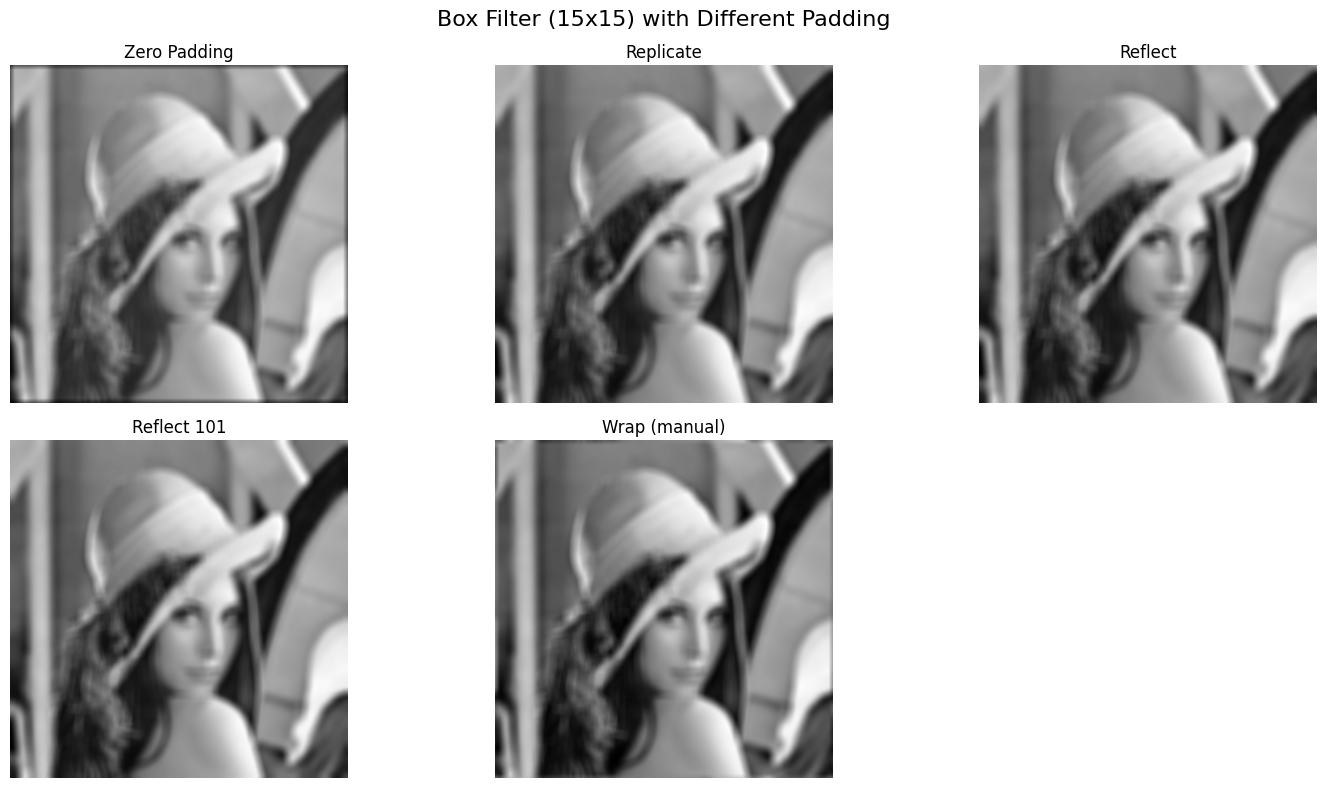

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load grayscale image ---
img = cv2.imread("image.png", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found!")

# --- Define a box filter kernel (e.g., 15x15) ---
kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size**2)

# --- Supported border handling methods ---
methods = {
    "Zero Padding": cv2.BORDER_CONSTANT,
    "Replicate": cv2.BORDER_REPLICATE,
    "Reflect": cv2.BORDER_REFLECT,
    "Reflect 101": cv2.BORDER_REFLECT_101
}

results = {}

# --- Apply filter for each supported method ---
for name, border_type in methods.items():
    filtered = cv2.filter2D(img, cv2.CV_64F, kernel, borderType=border_type)
    results[name] = cv2.convertScaleAbs(filtered)

# --- Manually handle WRAP using NumPy pad ---
wrap_img = np.pad(img, ((kernel_size//2,)*2, (kernel_size//2,)*2), mode='wrap')
wrap_filtered = cv2.filter2D(wrap_img, cv2.CV_64F, kernel)
# Crop back to original size
wrap_filtered = wrap_filtered[kernel_size//2:-kernel_size//2, kernel_size//2:-kernel_size//2]
results["Wrap (manual)"] = cv2.convertScaleAbs(wrap_filtered)

# --- Plot all results ---
plt.figure(figsize=(15, 8))

for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(2, 3, i)
    plt.title(name)
    plt.imshow(result, cmap="gray")
    plt.axis("off")

plt.suptitle(f"Box Filter ({kernel_size}x{kernel_size}) with Different Padding", fontsize=16)
plt.tight_layout()
plt.show()
